# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.


## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


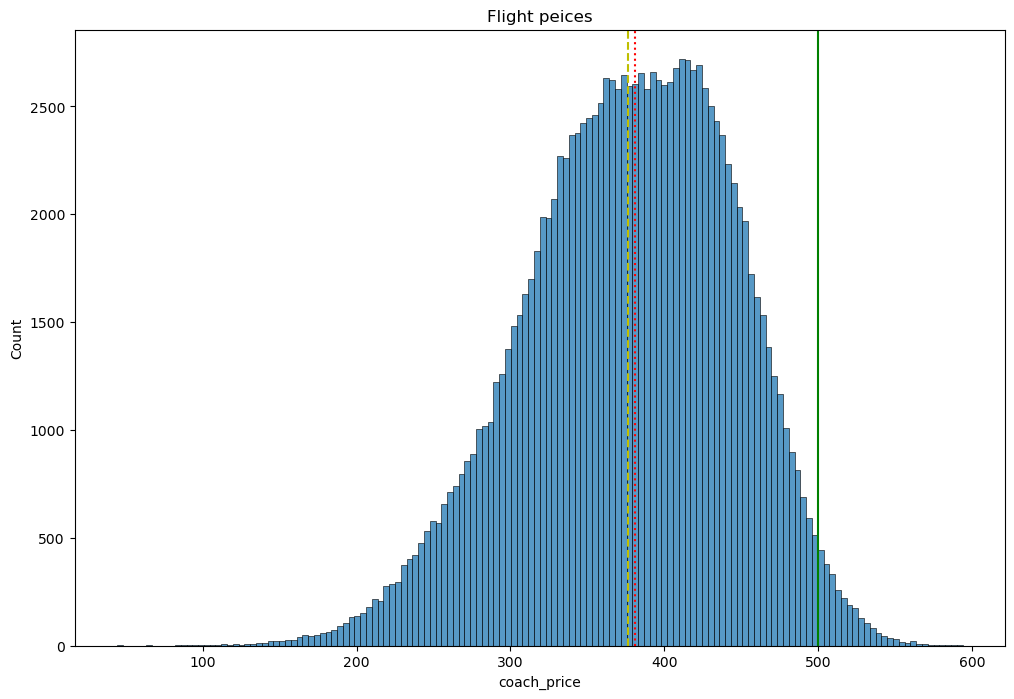

<Figure size 640x480 with 0 Axes>

In [5]:
## Find the mean and median of coach price
mean = flight.coach_price.mean()
median = flight.coach_price.median()

# Visualizing coach price
plt.figure(figsize=(12,8))

sns.histplot(flight.coach_price)
ax = plt.subplot()
ax.axvline(x = 500, color = 'g')
ax.axvline(x = mean, color = 'y', linestyle = '--')
ax.axvline(x = median, color = 'r', linestyle = ':')
plt.title('Flight peices')
plt.savefig('Coach-price.png') 

plt.show()
plt.clf()

In [10]:
from scipy.stats import iqr
IQR = iqr(flight.coach_price)
print(f"Mean = {mean} ,Median = {median} ,IQR = {IQR}")

Mean = 376.58525308213905 ,Median = 380.56 ,IQR = 95.23124999999999


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


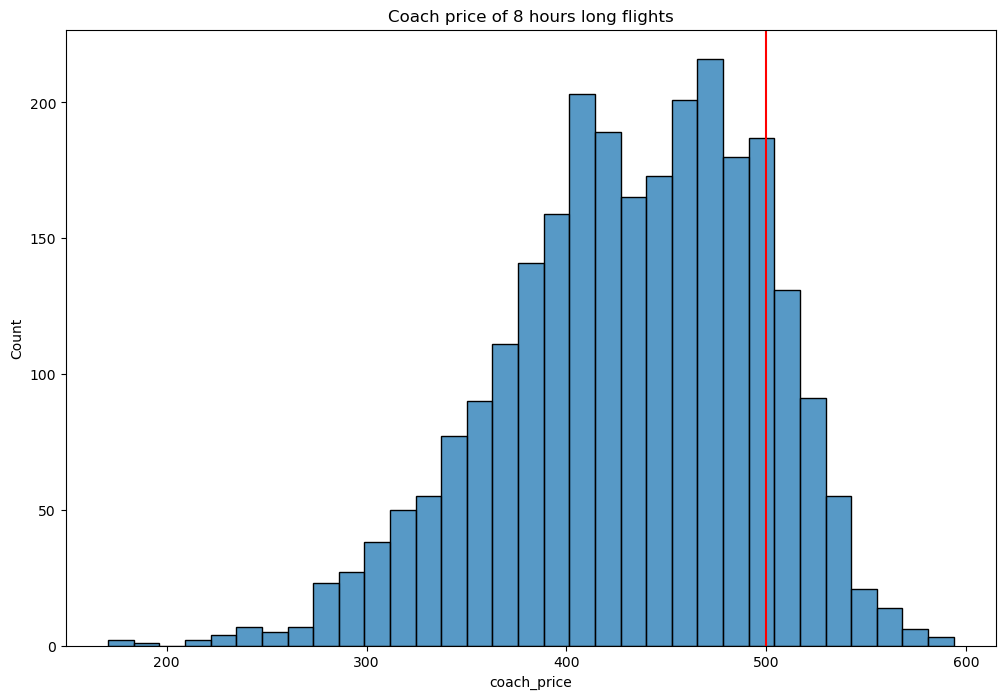

<Figure size 640x480 with 0 Axes>

In [13]:
## Avrage coach price of 8 hours long flights
eight_hour_mean = flight.coach_price[flight.hours == 8].mean()
eight_hour_median = flight.coach_price[flight.hours == 8].median()

# Visualizing the 8 hours coach price
plt.figure(figsize=(12,8))
sns.histplot(flight.coach_price[flight.hours == 8])
ax = plt.subplot()
ax.axvline(x = 500, color='r')
plt.title('Coach price of 8 hours long flights')
plt.savefig('Coach-price-8-hours-flights.png') 

plt.show()
plt.clf()

In [14]:
print(f"Mean = {eight_hour_mean} ,Median = {eight_hour_median} ")

Mean = 431.834377372817 ,Median = 437.115 


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


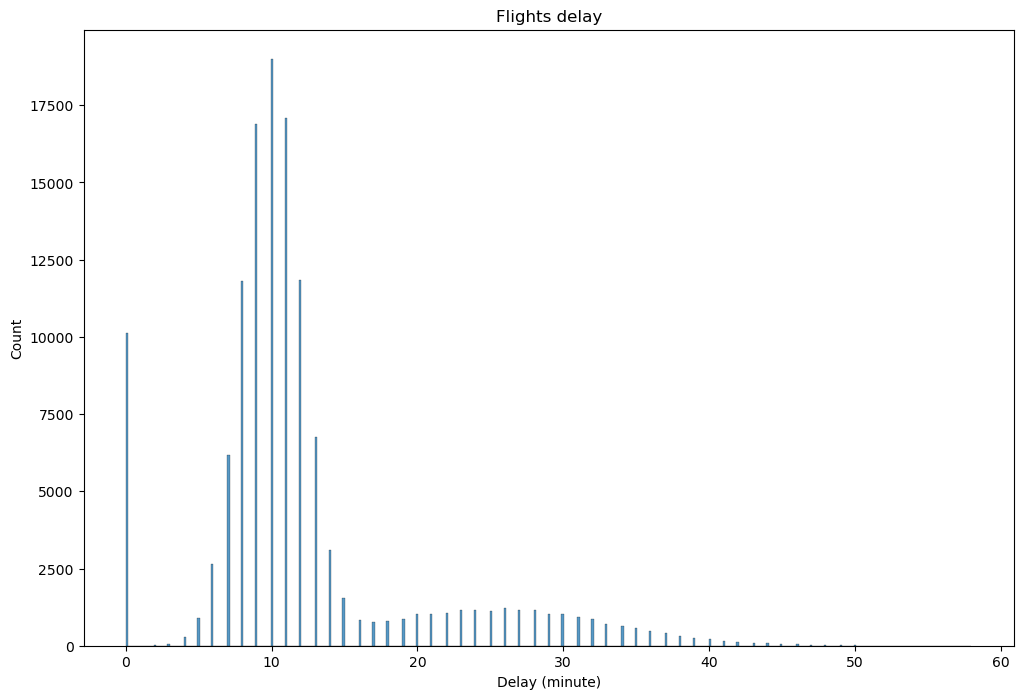

<Figure size 640x480 with 0 Axes>

In [4]:
## Visualizing flights delay
plt.figure(figsize=(12,8))
sns.histplot(flight.delay[flight.delay <= 500])
plt.xlabel('Delay (minute)')
plt.title('Flights delay')
plt.savefig('Flights-delay.png') 

plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

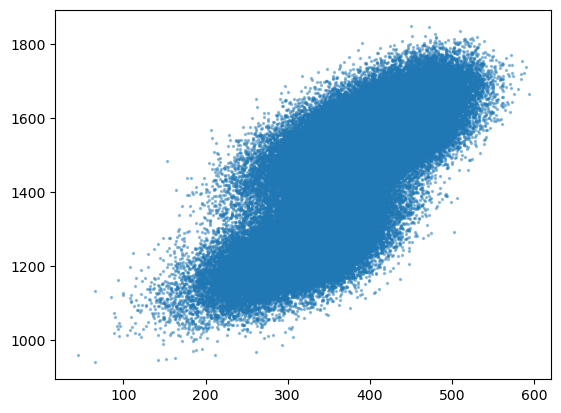

<Figure size 640x480 with 0 Axes>

In [5]:
## Using scatterplot to show relationship between coach and first-class prices
plt.scatter(flight.coach_price ,flight.firstclass_price, s = 2, alpha = 0.4)
plt.show()
plt.clf()

<Figure size 1200x800 with 0 Axes>

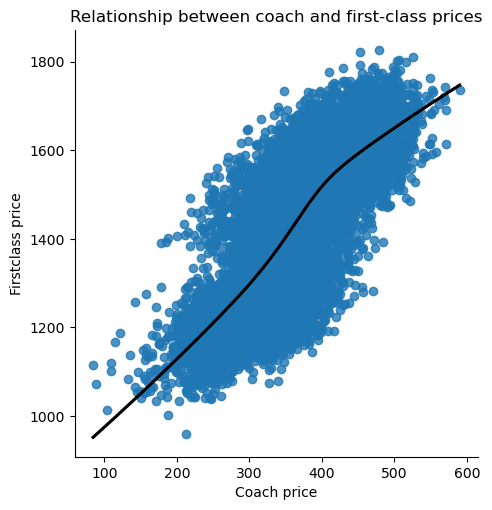

<Figure size 640x480 with 0 Axes>

In [6]:
## The code will randomly select 10% of the rows from the original dataset for visualization
perc = 0.1

## This line creates a subset (flight_sub) of the original dataset (flight) by randomly sampling a specified number of rows
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

# Visualizing oach and first-class prices by sampeling 10%
plt.figure(figsize=(12,8))
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.xlabel('Coach price')
plt.ylabel('Firstclass price')
plt.title('Relationship between coach and first-class prices')
plt.savefig('Coach and first-class prices.png') 

plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


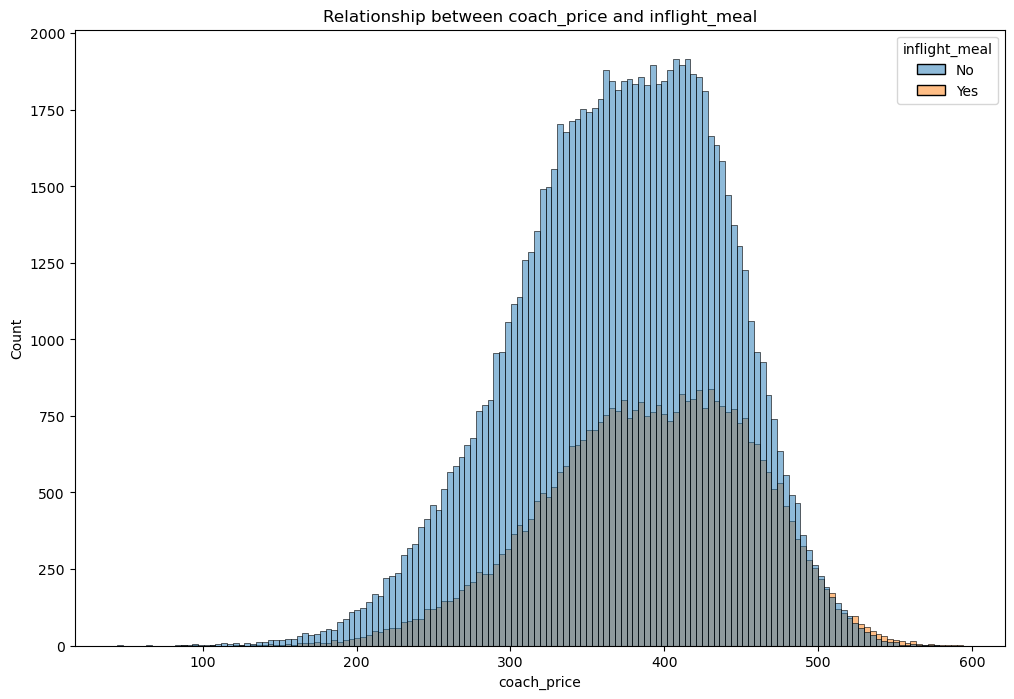

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

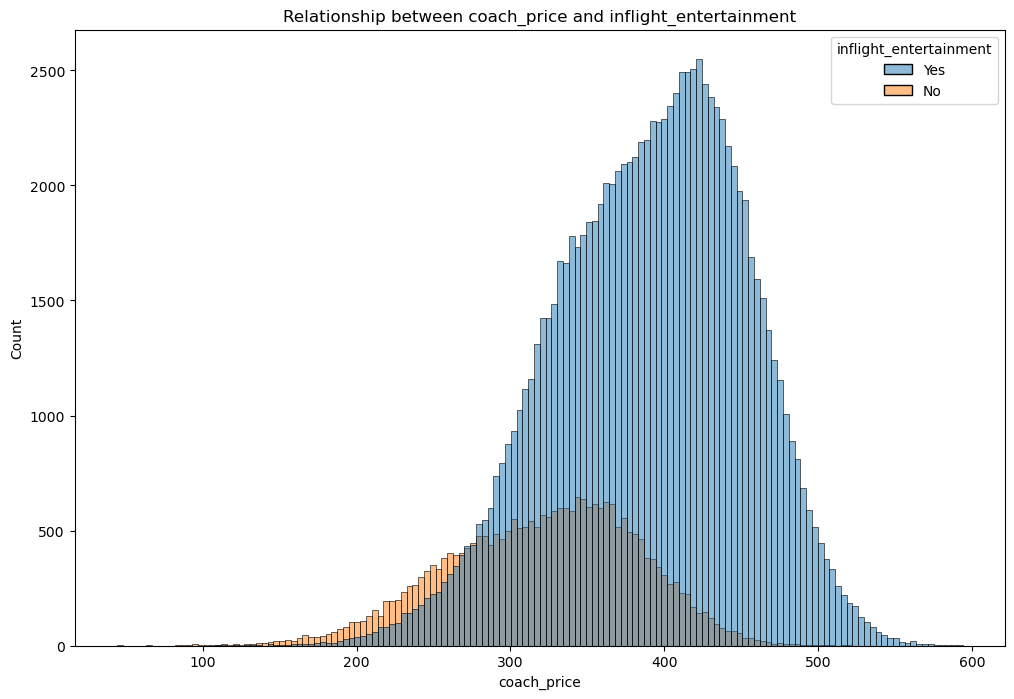

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

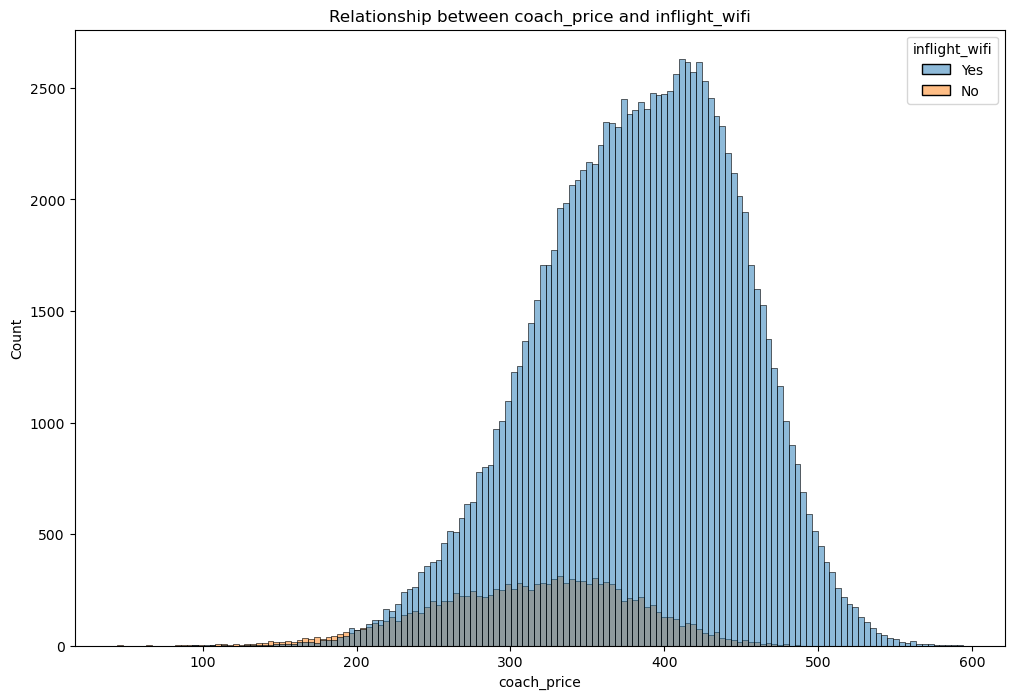

<Figure size 640x480 with 0 Axes>

In [18]:
## relationship between coach prices and inflight features â€” inflight meal, inflight entertainment, and inflight WiFi

# Features to visualize
features = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']

# Coach prices
coach_prices = 'coach_price'

# Loop through features
for feature in features:
    
    # Create a histogram plot for each feature
    plt.figure(figsize=(12,8))
    sns.histplot(flight, x=coach_prices, hue=flight[feature])
    plt.title(f'Relationship between {coach_prices} and {feature}')
    plt.savefig(f'{coach_prices} and {feature}.png') 
    
    plt.show()
    plt.clf()

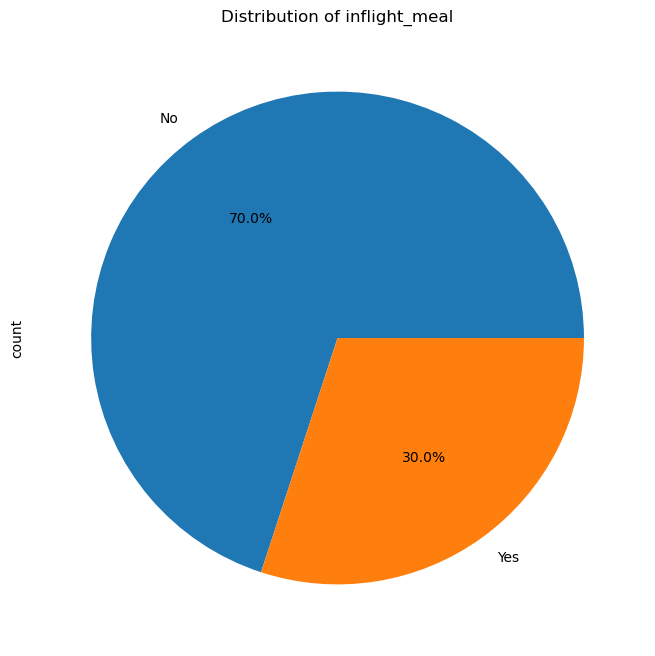

<Figure size 640x480 with 0 Axes>

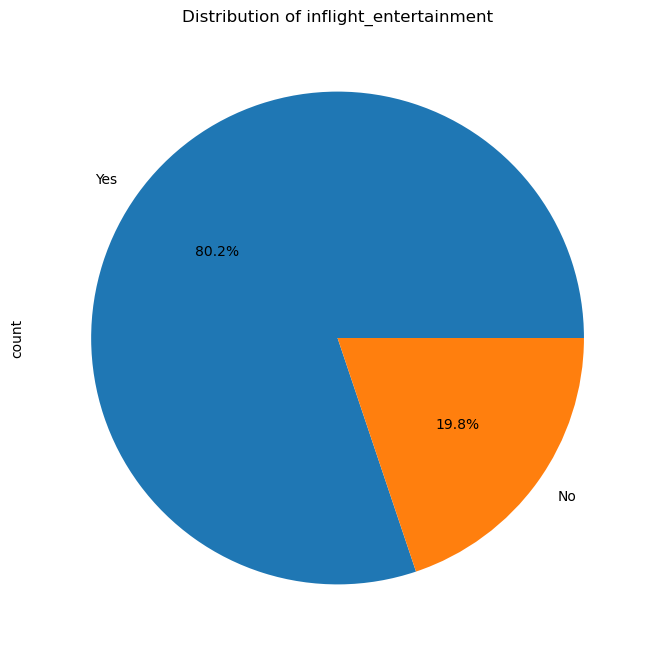

<Figure size 640x480 with 0 Axes>

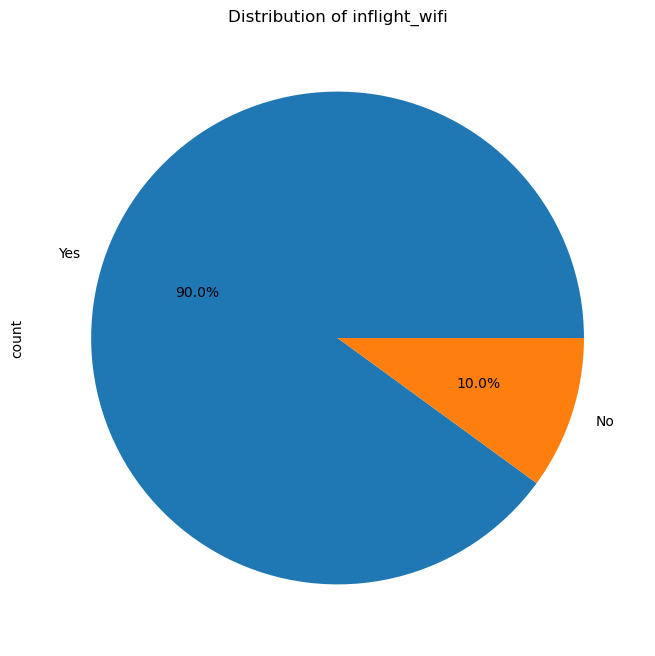

<Figure size 640x480 with 0 Axes>

In [19]:
# Features to visualize
features = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']

# Loop through features
for feature in features:
    
    # Create a pie chart for each feature
    plt.figure(figsize=(12, 8))
    flight[feature].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribution of {feature}')
    plt.savefig(f'{feature}_distribution.png') 
    
    plt.show()
    plt.clf()

6. How does the number of passengers change in relation to the length of flights?

<Figure size 1000x600 with 0 Axes>

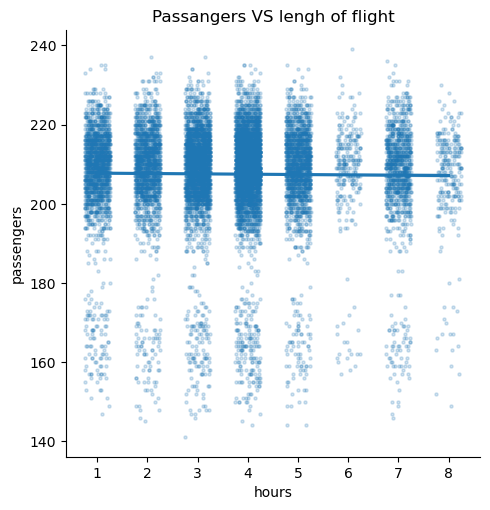

<Figure size 640x480 with 0 Axes>

In [14]:
## Relation of passangers and lengh of flight showing with lmplot

plt.figure(figsize=(10,6))
sns.lmplot(x='hours', y='passengers', data=flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2})
plt.title('Passangers VS lengh of flight')
plt.savefig('Relation of passangers and lengh of flight.png') 

plt.show()
plt.clf()


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

<Figure size 1200x800 with 0 Axes>

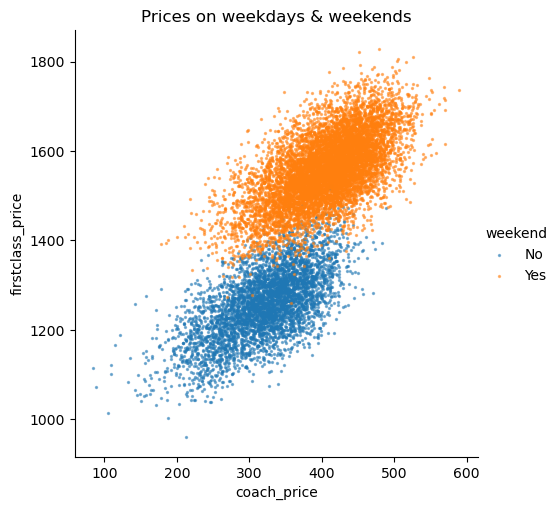

<Figure size 640x480 with 0 Axes>

In [19]:
## relationship between coach and first-class prices on weekends and weekdays by lmplot

plt.figure(figsize=(12,8))
sns.lmplot(x='coach_price', y='firstclass_price',hue='weekend', data=flight_sub , scatter_kws={'s' : 2 , 'alpha' : 0.5}, fit_reg=False)
plt.title('Prices on weekdays & weekends')
plt.savefig('Coach & first-class prices on weekends & weekdays.png') 

plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

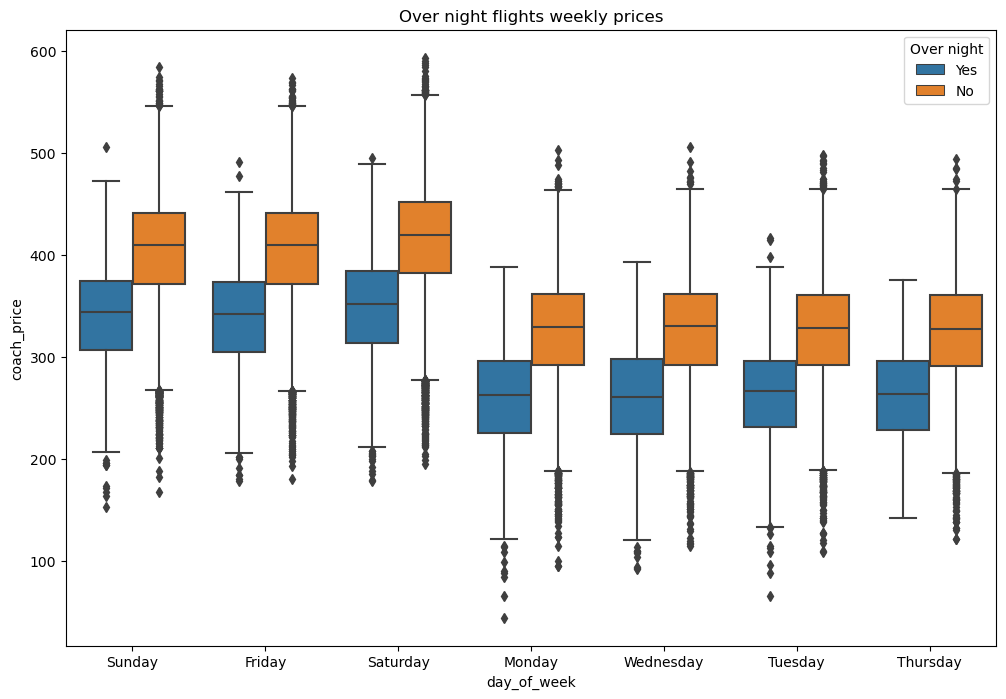

<Figure size 640x480 with 0 Axes>

In [20]:
## Relation of coach prices and flights over night by boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.legend(title='Over night')
plt.title('Over night flights weekly prices')
plt.savefig('Over night flights weekly prices.png') 

plt.show()
plt.clf()